# Introduction  

This chapter introduces python functions, graphics, widgets, and pandas.  

To run the code, click on the **rocket** symbol at the top of the page and select **Live Code**.  The server 
will then launch and, after some time (be patient), you will see **ready**.  You can then click **Run** on the cells below.  You should run the cells one at a time, without skipping, as values computed in one cell are reused in subsequent cells.

Let's run the next cell.

In [10]:
print('Hello world')

Hello world


Next, change the values of x and y in the cell below and click run.

In [11]:
x = 3
y = 4

print('x + y = ', x + y)

x + y =  7


In the cell. above, you could try to print $x*y$ instead of x + y.  You can use that cell to try your own code.

If you are not familiar with Python, or if you want a refresher, you may find **Appendix 1** useful.

We now load some necesary libraries. (Run the next cell.)

In [12]:
from IPython.core.display import HTML
import numpy as np
import matplotlib
import scipy
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
import pandas as pd
params = {'figure.figsize':(12,6), # These are plot parameters
         'xtick.labelsize': 16,
         'ytick.labelsize':16,
         'axes.titlesize':18,
         'axes.labelsize':18,
         'lines.markersize':4,
         'legend.fontsize': 20}

from matplotlib import pyplot as plt
matplotlib.rcParams.update(params)
import random
from ipywidgets import *


print('The libraries loaded successfully')

The libraries loaded successfully


We start with some Python experiments with random variables. 

## Plotting Distributions of Random Variables

### Binomial: B(100,p) 

We plot the probability mass function of the Binomial distribution with parameters $N = 100$ and
$p = 0.1, 0.2, 0.5$. For $n = 0, \ldots, 100$, this is the probability that $100$ flips of a coin
that yields heads with probability $p$ result in $n$ heads.

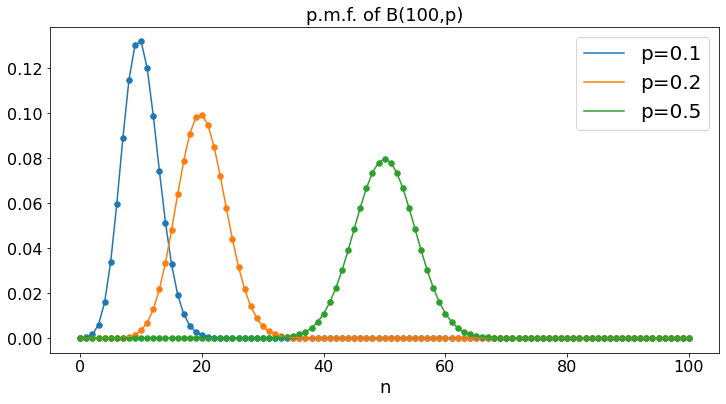

In [27]:
N = 101
a = 0.1
b = 0.2
c = 0.5
A = np.zeros(N)
B = np.zeros(N)
C = np.zeros(N)
X = np.arange(N)
for n in range(N):
    A[n] = binom.pmf(n,N-1,a)
    B[n] = binom.pmf(n,N-1,b)
    C[n] = binom.pmf(n,N-1,c)
plt.plot(A,label='p=0.1') # continuous plot gives a sense of the shape of the pmf
plt.scatter(X,A,s=30) # we add the markers on the integers
plt.plot(B,label='p=0.2')
plt.scatter(X,B,s=30)
plt.plot(C,label='p=0.5')
plt.scatter(X,C,s=30)
plt.title('p.m.f. of B(100,p)')
plt.xlabel('n')
plt.legend()
plt.show()

### PPF of B(100,0.2):

The percent point function (ppf) is the inverse CDF.  For instance, binom.ppf(0.95,100,0.2) is the
smallest value of n such that $P(X \leq n) \geq 0.95$, where $X = B(100,0.2)$.

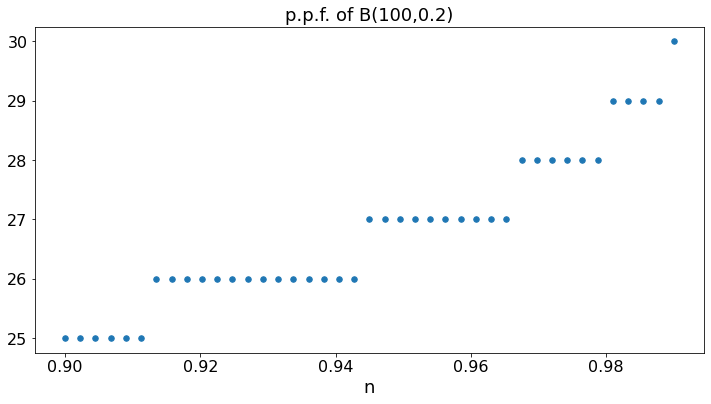

In [28]:
N = 41
b = 0.2
B = np.zeros(N)
X = np.zeros(N)
for n in range(N):
    X[n] = 0.9 + 0.09*n/(N-1)
    B[n] = binom.ppf(X[n],100,b)
plt.scatter(X,B,s=30)
plt.title('p.p.f. of B(100,0.2)')
plt.xlabel('n')
plt.show()

### Poisson: P($\lambda$)

The Poisson distribution with parameter $\lambda$ is that of the number of phone calls that you receive in one day, if you receive $\lambda$ phone calls per day, on average.

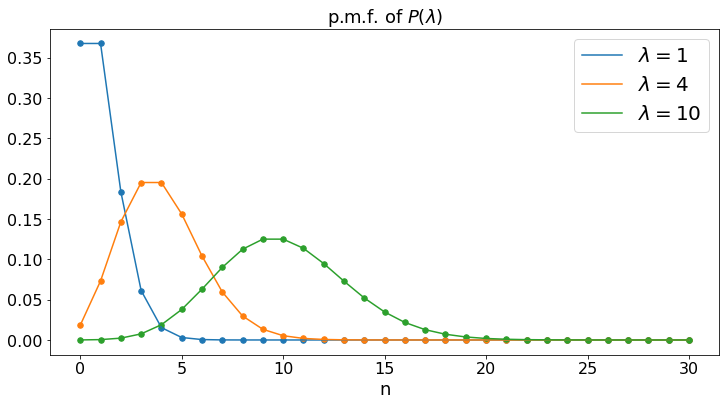

In [29]:
N = 31
a = 1
b = 4
c = 10
A = np.zeros(N)
B = np.zeros(N)
C = np.zeros(N)
X = np.arange(N)
for n in range(N):
    A[n] = poisson.pmf(n,a)
    B[n] = poisson.pmf(n,b)
    C[n] = poisson.pmf(n,c)
    #plt.xticks = 
plt.plot(A,label='$\lambda = 1$')
plt.scatter(X,A,s=30)
plt.plot(B,label='$\lambda = 4$')
plt.scatter(X,B,s=30)
plt.plot(C,label='$\lambda = 10$')
plt.scatter(X,C,s=30)
plt.title('p.m.f. of $P(\lambda)$')
plt.xlabel('n')
plt.legend()
plt.show()

### Exponential: Expo($\lambda$)

The exponential distribution with pamameter $\lambda$ is that of the time (in days) until the next phone call, if  you get $\lambda$ phone calls per day, on average.  

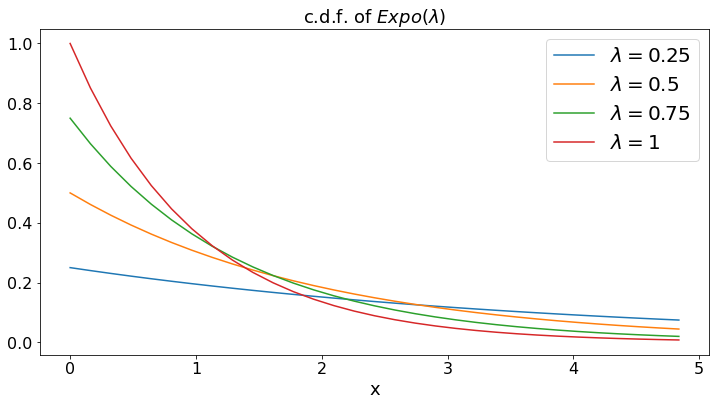

In [30]:
N = 31
a = 0.25
b = 0.5
c = 0.75
d = 1
A = np.zeros(N)
B = np.zeros(N)
C = np.zeros(N)
D = np.zeros(N)
X = (5/N)*np.arange(N)
for n in range(N):
    A[n] = a*np.exp(- a*X[n])
    B[n] = b*np.exp(- b*X[n])
    C[n] = c*np.exp(- c*X[n])
    D[n] = d*np.exp(- d*X[n])
    #plt.xticks = 
plt.plot(X,A,label='$\lambda = 0.25$')
plt.plot(X,B,label='$\lambda = 0.5$')
plt.plot(X,C,label='$\lambda = 0.75$')
plt.plot(X,D,label='$\lambda = 1$')
plt.title('c.d.f. of $Expo(\lambda)$')
plt.xlabel('x')
plt.legend()
plt.show()

## Generating and Plotting Random Variables

np.random.uniform(a, b) returns one value chosen uniformly at random in the interval $[a, b]$.

np.random.uniform(a, b, n) returns n values chosen independently and uniformly at random in the interval $[a, b]$.

Let X = np.random.uniform(0, 1, 100).  We then plot these values. 

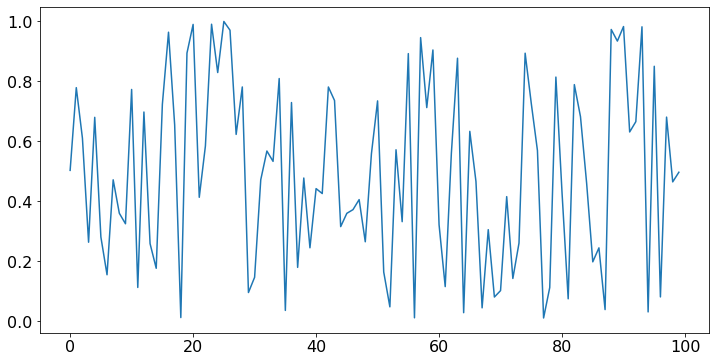

In [31]:
N = 100 # number of values
X = np.random.uniform(0, 1, N) # N uniform random values in [0, 1]
plt.plot(X); # plot these values. The ; at the end of the line suppresses unwanted outputs

Since X is a sequence of values, it is more appropriate to use a **scatter plot** of X as a function of the index. To do this, we define timeSteps = np.arange(100) = [0, 1, ..., 99] and we plot X against timeSteps.

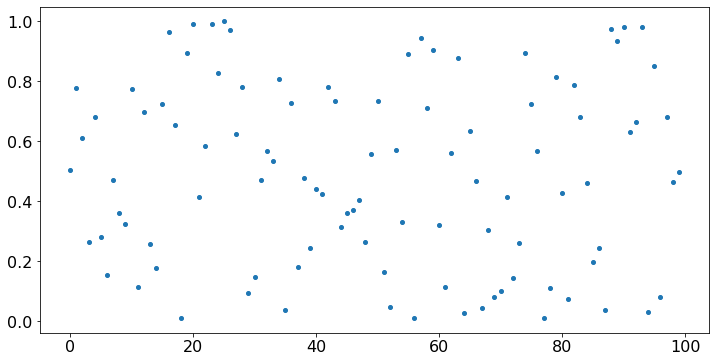

In [32]:
timeSteps = np.arange(N)
plt.scatter(timeSteps,X);

## Strong Law of Large Numbers

The values above look like noise, because they are independent. Is there some statistical regularity of any kind in this noise? We compute Y[n], the sample average of the first n values, for n = 1, ..., 100 and we plot Y. That is, Y[n] = (X[0] + ... + X[n])/(n+1) for n = 0, ..., 99.  (Note that indexing requires some care.) The values of X are kept in memory, so we don't have to generate them again, if we ran the previous cell.

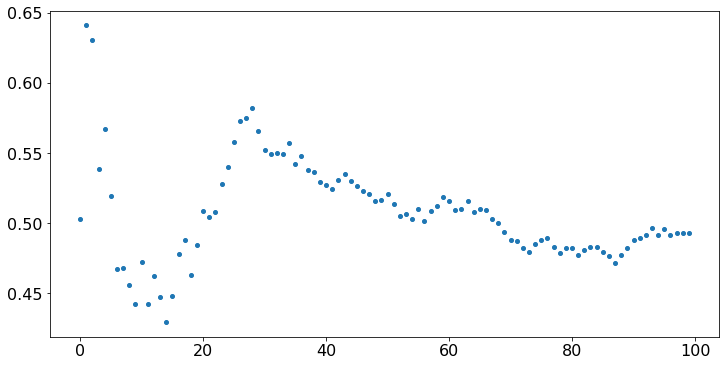

In [33]:
Y = np.zeros(N) # an array of N zeros
for n in range(N): # for n = 0, 1, ..., N - 1 (remember that Python starts with 0)
    Y[n] = sum(X[:n+1])/(n+1) # X[:n+1] is the list of the first n+1 values of X, for m = 0, 1, ..., n
plt.scatter(timeSteps,Y); 

# We could have written this code more efficiently as follows (can you tell why it is more efficient?):
# Y[0] = X[0]
# for n in range(99):
#     Y[n+1] = (n*Y[n] + X[n+1])/(n+1)
# plt.plot(Y);

## Central Limit Theorem

Observe that, even though the values X fluctuate wildly, their sample average converges to 0.5. That property is the *Strong Law of Large Numbers*.  Note that Y[99] tends to be closer to 0.5 than Y[15].  The *Central Limit Theorem* (CLT) makes that observation precise.  To illustrate that result, let us repeat the previous experiment 100 times and count the fraction of times that Y[n] falls in intervals of width 0.01, for n = 15 and n = 99.  We do this the hard way, just to build some familiarity with the code.

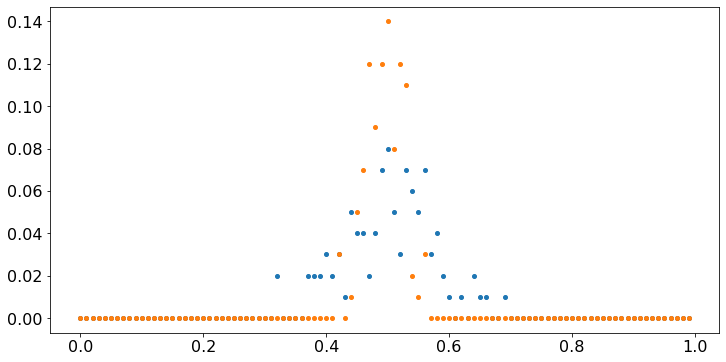

In [34]:
V = np.zeros(100) # V[k] will be the number of times that Y[15] falls in [k*0.01, (k+1)*0.01]
W = np.zeros(100) # W[k] will be the number of times that Y[99] falls in [k*0.01, (k+1)*0.01]
for idx in range(100): # idx is the index of our experiment
    X = np.random.uniform(0, 1, N) # we generate X
    Y[0] = X[0]
    for n in range(N-1):
        Y[n+1] = (n*Y[n] + X[n+1])/(n+1) # we generate Y, using the more efficient code
    k = int(100*Y[15]) # int(x) is the integer part of x. For instance, int(35.7) = 35
                      # this is the value of k such that Y[15] is in [k*0.05, (k+1)*0.05]
    V[k] += 1 # that is, V[k] = V[k] + 1
    k = int(100*Y[99])
    W[k] += 1
values = 0.01*np.arange(100) # this is [0, 0.01, 0,02, ..., 0.99]
plt.scatter(values,V/100); # the scatter plot gives the value of V as a function of A; 
                      # we divide V by 100 to get the fraction of times
plt.scatter(values,W/100);
    

We can add legends to the scatter plot as follows.

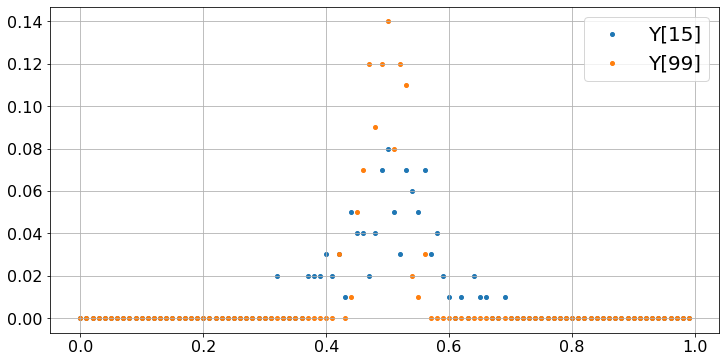

In [35]:
fig, ax = plt.subplots()
ax.scatter(values, V/100,label='Y[15]')
ax.scatter(values, W/100,label='Y[99]')
ax.legend()
ax.grid(True)
plt.show()

These plots show that most of the time, Y[99] is very close to 0.5 whereas Y[15] tends to be more dispersed.
To make the case a bit stronger, we repeat the experiment 10000 times, instead of 100.

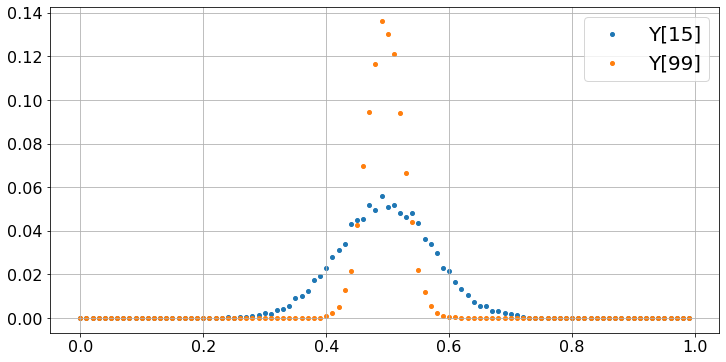

In [36]:
V = np.zeros(100) # V[k] will be the number of times that Y[15] falls in [k*0.01, (k+1)*0.01]
W = np.zeros(100) # W[k] will be the number of times that Y[99] falls in [k*0.01, (k+1)*0.01]
for idx in range(10000): # idx is the index of our experiment
    X = np.random.uniform(0, 1, 100) # we generate X
    Y[0] = X[0]
    for n in range(99):
        Y[n+1] = (n*Y[n] + X[n+1])/(n+1) # we generate Y, using the more efficient code
    k = int(100*Y[15]) # int(x) is the integer part of x. For instance, int(35.7) = 35
                      # this is the value of k such that Y[15] is in [k*0.01, (k+1)*0.01]
    V[k] += 1 # that is, V[k] = V[k] + 1
    k = int(100*Y[99])
    W[k] += 1
timeSteps = 0.01*np.arange(100) # this is [0, 0.01, 0,02, ..., 0.99]
fig, ax = plt.subplots()
ax.scatter(values, V/10000,label='Y[15]')
ax.scatter(values, W/10000,label='Y[99]')
ax.legend()
ax.grid(True)
plt.show()

The two plots show that Y[15] and Y[99] have a probability distribution that looks like a bell curve, i.e., a Gaussian distribution.  The distribution of Y[15] is more spread out than that of Y[99] which is more concetrated around 0.5.  The spread is measured by the standard deviation of the distribution and its value is $\sigma / \sqrt{16} = \sigma/4$ for Y[15] and $\sigma/\sqrt{100} = \sigma/10$ for Y[99].  Here, $\sigma$ is the standard deviation of a uniform [0, 1] random variable, and $\sigma = 1/\sqrt{12} \approx 0.3$. Roughly, about $70\%$ of the values fall within one standard deviation of 0.5.  Thus, one expects that about $70\%$ of the values of Y[15] fall within $\sigma/4 = 0.07$ of 0.5 and $70\%$ of the values of Y[99] fall within $\sigma/10 = 0.03$ of 0.5. 

Let's try to see how far the empirical distribution of Y[99] is from a Gaussian.  The Central Limit Theorem states that Y[99] should be almost be distributed like a Gaussian random variable with mean 0.5 and standard deviation $\sigma/10 \approx 0.03$.  We plot the fraction of experiments, out of 10000, where Y[99] is less than $k \times 0.01$, as a function of $k \in [1, \ldots, 100]$ and we also plot $F[k/100]$ where $F$ is the cumulative distribution function (cdf) of a Gaussian G with mean 0.5 and standard deviation 0.03. We use the cdf norm.cdf of a Gaussian SG with mean 0 and standard deviation 1. The trick is that (G - 0.5)/0.03 is then distributed like SG, so that the probability that G < x is the probability that (G - 0.5)/0.03 < (x - 0.5)/0.03, i.e., the probability that SG < (x - 0.5)/0.03.  As you see, the plot confirms the prediction of the CLT.

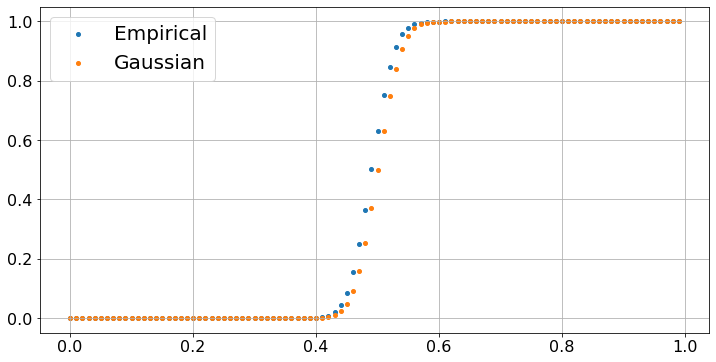

In [37]:
B = np.zeros(100)
C = np.zeros(100)
for k in range(1,100):
    B[k] = B[k-1] + W[k]
    C[k] = norm.cdf((k/100 - 0.5)/0.03)
fig, ax = plt.subplots()
ax.scatter(values, B/10000,label='Empirical')
ax.scatter(values, C,label='Gaussian')
ax.legend()
ax.grid(True)
plt.show()

## Markov Chain

Using a uniform random variable we can generate random variables with an arbitrary distribution.  Let us generate a random variable that takes the value $x_k$ with probability $p_k$ for $k = 0, \ldots, K -1$ where the numbers $p_k$ are nonnegative and add up to one.  We define a function dicreteRV(x,p) that returns such a random variable. Let U be a random variable uniformly distributed in $[0, 1]$.  Define
$$
z = x_k \mbox{ if } p_0 + \cdots + p_{k-1} < U \leq  p_0 + \cdots + p_{k}, k = 0, \ldots, K - 1.
$$
Then we see that the probability that $z = x_k$ is $p_k$ since $p_k$ is the length of the interval of values of $U$ for which we decide that $z = x_k$.

In [38]:
#Here is the code:

def discreteRV(x,p): # here x = [x[0],...,x[K-1]], p = [p[0], ..., p[K-1]]
    # returns a random value equal to x[k] with probability p[k]
    z = 0
    K = len(x)
    P = np.zeros(K)
    for k in range(K):
        P[k] = sum(p[:k]) # P[0] = p[0], p[1] = p[1], P[2] = p[0] + p[1], ..., P[K-1] = p[0] + ... + p[K-1] = 1
    U = np.random.uniform(0,1) # here is our uniform RV
    for k in range(1,K):
        found = False
        if U < P[k]:
            z = x[k-1]
            found = True
            break
    if not found:
        z = x[K-1]
    return z
        
x = [3, 4, 5]
p = [0.5, 0.3, 0.2]

Y = discreteRV(x,p)
print('Random Value chosen in the set ' + str(x) + ' with probabilities ' + str(p) + ' = ', Y)

Random Value chosen in the set [3, 4, 5] with probabilities [0.5, 0.3, 0.2] =  3


Next we use our new function discreteRV(x,p) to construct a Markov chain that has the following state transition diagram:
![title](Figs/MC.pdf)
This diagram means that if the Markov chain has value X[n] = 0 at step n, then its value X[n+1] is 0 with probability 0.4 and 1 with probability 0.6, and similarly for the other possible values of X[n].  Thus, if X[n] = i, then X[n+1] is equal to j with probability P[i,j], where P[i,j] is component [i, j] of the matrix P defined as follows:
$$
P = \left[
\begin{array}{c c c}
0.4 & 0.6 & 0 \\
0.7 & 0 & 0.3 \\
0.2 & 0.5 & 0.3 
\end{array}
\right].
$$
That is, if X[n] = i, then X[n+1] is discreteRV(x,p) where x = [0, 1, 2] = np.arange(3) and p = P[i].  In Python, P[i] is row i of the matrix P. Hence, we have the following code.

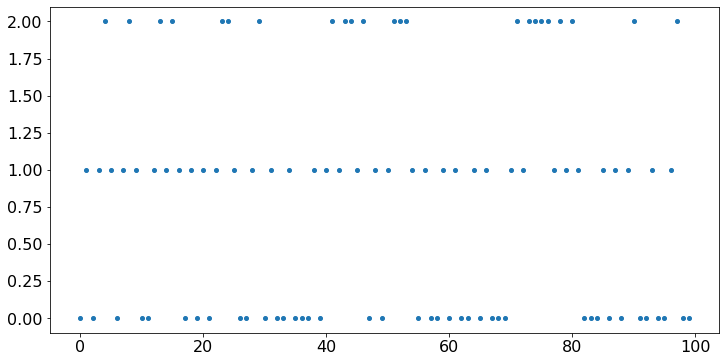

In [39]:
N = 100 # number of steps
P = [[0.4,0.6,0],
    [0.7,0,0.3],
    [0.2,0.5,0.3]]
x = np.arange(3) # [0,1,2]: the possible values of X[n]
X = [0]*N # The successive values of the Markov chain; X[0] = 0; X = list of integers
for n in range(N-1):
    p = P[X[n]].copy() # we make a fresh copy of P[X[n]] as discreteRV modifies the order of p
                       # otherwise, modifying p would also modify the rows of P
                       # writing Y = X means that Y points to the same values as X, so that modifying
                       # Y also modifies X.  This is a common source of errors in Python code
    X[n+1] = discreteRV(x,p) 
timeSteps = np.arange(N) # the x-axis values (successive steps)
plt.scatter(timeSteps,X);

The vertical axis in the plot above is not right.  We should restrict the vertical ticks to the possible state values 0, 1, 2.  We do this below. We also add a title and labels on the axes.

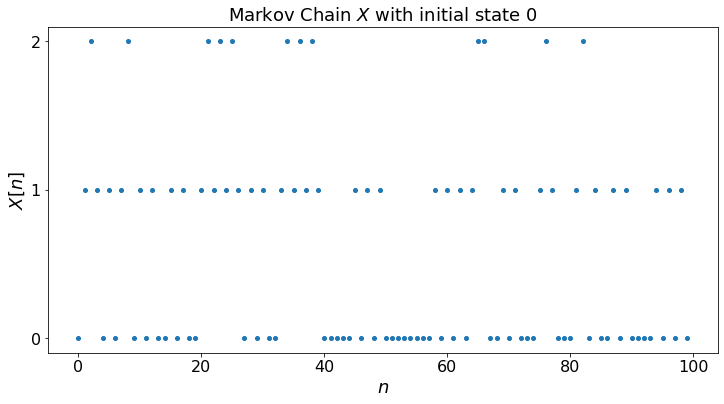

In [40]:
N = 100 # number of steps
P = [[0.4,0.6,0],
    [0.7,0,0.3],
    [0.2,0.5,0.3]]
x = np.arange(3) # [0,1,2]: the possible values of X[n]
X = [0]*N # The successive values of the Markov chain; X[0] = 0; X = list of integers
for n in range(N-1):
    p = P[X[n]].copy() # we make a fresh copy of P[X[n]] as discreteRV modifies the order of p
                       # otherwise, modifying p would also modify the rows of P
                       # writing Y = X means that Y points to the same values as X, so that modifying
                       # Y also modifies X.  This is a common source of errors in Python code
    X[n+1] = discreteRV(x,p) 
timeSteps = np.arange(N) # the x-axis values (successive steps)
labels = ['0', '1', '2']
plt.yticks([0, 1, 2], labels)
plt.ylabel("$X[n]$")
plt.xlabel("$n$")
plt.title("Markov Chain $X$ with initial state "+str(X[0]))
plt.scatter(timeSteps,X);


For convenience, we create a function that generates the Markov chain. For later use, we also compute the probability distribution of X[n] for each n.

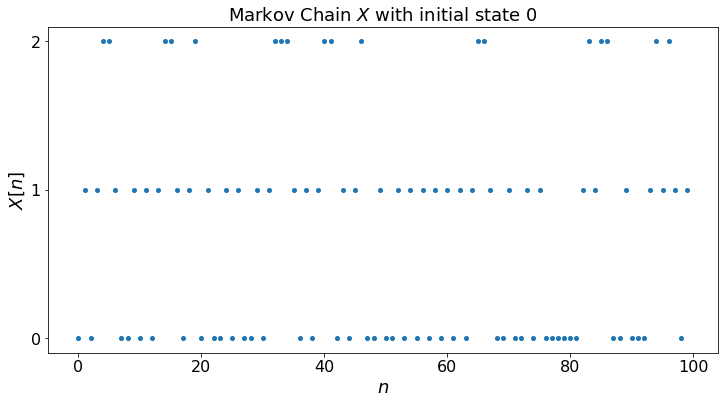

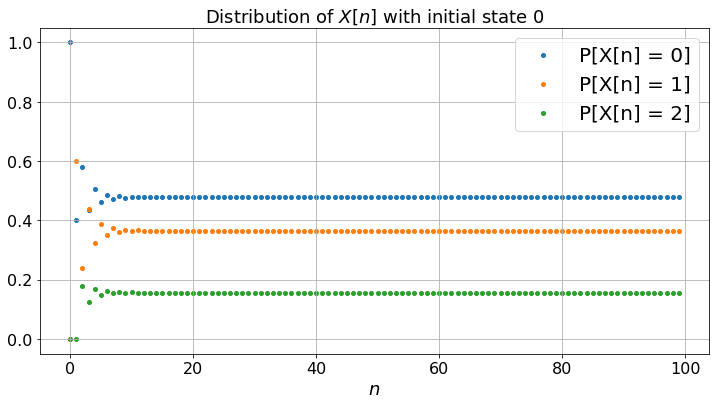

In [41]:
def MC(N,x0,P):
    # returns X[0], X[1], ..., X[N-1]
    M = len(P) # number of states
    x = np.arange(M) # [0,1,2]: the possible values of X[n]
    X = [0]*N # The successive values of the Markov chain; X[0] = 0
    X[0] = x0
    Q = np.zeros([M,N]) # Q[i,n] will be the probability that X[n] = i
    Q[:,0] = np.identity(M)[x0] # Q[:,0] is the unit vector in direction x0
    for n in range(N-1):
        p = P[X[n]].copy() # we make a fresh copy of P[X[n]] as discreteRV modifies the order of p
                           # otherwise, modifying p would also modify the rows of P
        X[n+1] = discreteRV(x,p)
        Q[:,n+1] = np.einsum('k,kj->j',Q[:,n],P) # the Einstein sum indicates how to manipulate indices
                                                 # np.einsum('ik,kj->i,j',A,B) is the product of A and B
    return X, Q
 
P = [[0.4,0.6,0],
    [0.7,0,0.3],
    [0.2,0.5,0.3]]
x0 = 0    
N = 100
timeSteps = np.arange(N)
X, Q = MC(N,x0,P)

labels = ['0', '1', '2']
plt.yticks([0, 1, 2], labels)
plt.ylabel("$X[n]$")
plt.xlabel("$n$")
plt.title("Markov Chain $X$ with initial state "+str(X[0]))
plt.scatter(timeSteps,X);
plt.show()

fig, ax = plt.subplots()
plt.xlabel("$n$")
plt.title("Distribution of $X[n]$ with initial state "+str(X[0]))
for i in range(len(P)):
    ax.scatter(timeSteps, Q[i,:],label='P[X[n] = ' + str(i)+ ']')
ax.legend()
ax.grid(True)
fig.set_figheight(6)
fig.set_figwidth(12) # We specify the size of the figure
plt.show()

Let'us calculate the fraction of time Z[i,n] that the Markov chain takes the value i during [0, 1, ..., n-1]. To do this, we generate the Markov chain, then compute the Z[i, n].  (Don't forget to run the previous cell first.)

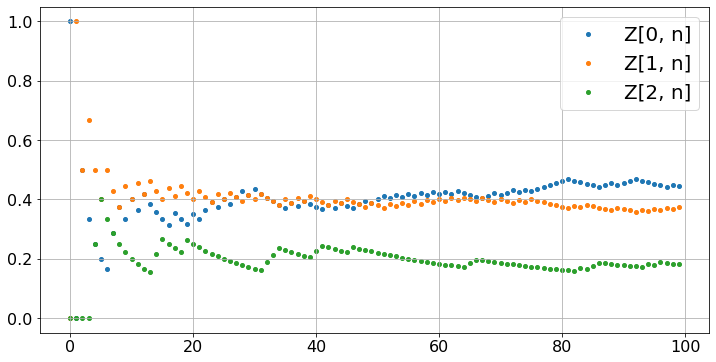

In [42]:
Z = np.zeros([len(P),N]) # Z is two-dimensonal: len(P) by N
for i in range(len(P)):
    Z[i,0] = i == x0 # thus, Z[x0,0] = 1 and Z[i,0] = 0 for i not equal to x0
for n in range(N-1):
    for i in range(len(P)):
        Z[i,n+1] = (n*Z[i,n] + (X[n+1] == i))/(n+1)
fig, ax = plt.subplots()
for i in range(len(P)):
    ax.scatter(timeSteps, Z[i,:],label='Z[' + str(i) +', n]')
ax.legend()
ax.grid(True)

plt.show()       

### Markov Chain of Fig. 3.11

As another example, we simulate the Markov chain in Fig. 3.11.

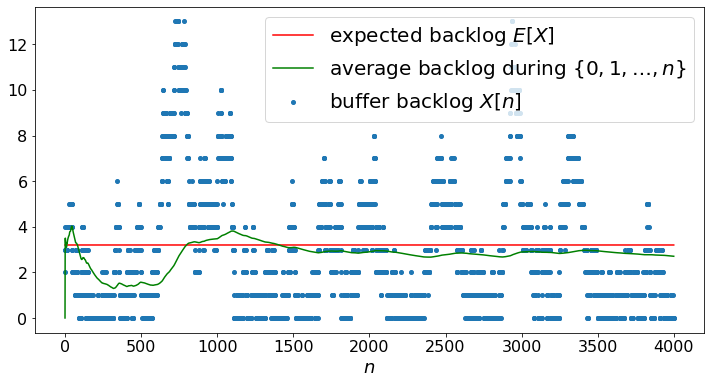

In [43]:
M = 21 # number of states
P = np.zeros([M+1,M+1])
lamb = 0.16
mu = 0.20
p2 = lamb*(1 - mu)
p0 = mu*(1 - lamb)
p1 = 1 - p0 - p2
A = p2/(p0 - p2)
P[0,0] = 1 - p2
P[0,1] = p2
P[M,M] = 1 - p0
P[M,M-1] = p0
for m in range(1,M):
    P[m,m] = p1
    P[m,m-1] = p0
    P[m,m+1] = p2
P = P.tolist()
N = 4000
X, Q = MC(N,2,P)

EX = A*np.ones(N)
AX = np.zeros(N)
for n in range(1,N):
    AX[n] = ((n-1)*AX[n-1]+X[n])/n
timeSteps = np.arange(N)
#labels=[]
#for m in range(M):
#    labels.append(str(m))
#plt.yticks(np.arange(M), labels)
plt.xlabel("$n$")
plt.scatter(timeSteps,X,label="buffer backlog $X[n]$")
plt.plot(EX,label='expected backlog $E[X]$',c='red')
plt.plot(AX,label='average backlog during $\{0,1,\ldots,n\}$',c ='green')
plt.legend()
plt.show()

## Widgets

Instead of modifying parameters in the code of a cell, it is sometimes convenient to expose these parameters in 'widgets'.  We illustrate this method on the plot of a Gaussian with mean $\mu$ and standard deviation $\sigma$. In a Jupyter Notebook, the widgets are well-integrated with code cells and ajusting a widget triggers a new run of the code.  Unfortunately, there is a major bug in Jupyter Book and widgets do not work as smoothly as in Jupyter Notebooks.  As a work-around, we separate the widgets and the code into separate cells.  Also, some useful widgets still do not work with this fix.  Oh well.... we will live with what works.

In [1]:
def dummy(mud,sigmad):
    global mu, sigma
    mu, sigma = float(mud), float(sigmad)

    
mud = widgets.Dropdown(options=['-3', '-2', '-1', '0','1','2','3'],value='0',description='$\mu$',disabled=False)
sigmad = widgets.Dropdown(options=['0.1', '0.2', '0.5', '1','1.5','2'],value='1',description='$\sigma$',disabled=False)
z = widgets.interactive(dummy, mud = mud, sigmad = sigmad)
display(z)

NameError: name 'widgets' is not defined

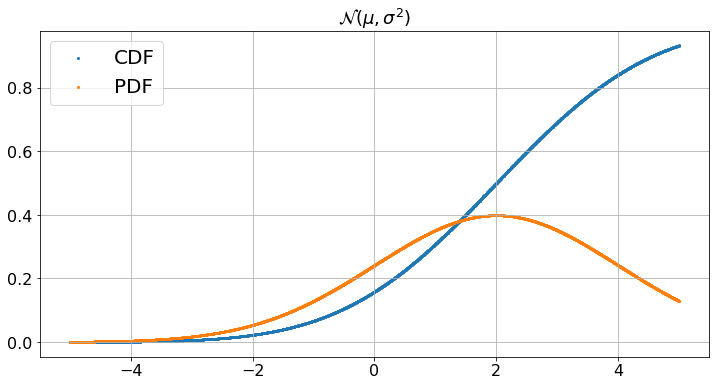

To change the parameter values, go back to the previous cell 
 adjust widgets, and run this cell again


In [19]:
def plotGaussian(mu,sigma):
    N = 1000
    values = 0.005*np.arange(2*N + 1) - 0.005*N # this is our x-axis 
    B = np.zeros(2*N + 1) # this is our y-axis for the cdf
    C = np.zeros(2*N + 1) # this is our y-axis for the pdf
    for n in range(2*N + 1):
        B[n] = norm.cdf((values[n] - mu)/sigma)
        C[n] = norm.pdf((values[n] - mu)/sigma)    
    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(12) # We specify the size of the figure
    ax.scatter(values, B,label='CDF',s=4)
    ax.scatter(values, C,label='PDF',s=4)
    ax.legend()
    ax.grid(True)    
    plt.title("${\cal N}(\mu,\sigma^2)$") # We add a title to the graph
    plt.show()
        
plotGaussian(mu,sigma)
print('To change the parameter values, go back to the previous cell, \n adjust widgets, and run this cell again')

## Basic Data Analysis

We use pandas to explore sample data.  We use a table of weights and heights borrowed from

http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights

This data is in the excel spreadsheet HW.xlsx of this chapter's directory.  First, we read the spreadsheet into a DataFrame that we print. We then calculate the linear regression of weight over height. (More about this in later chapters.)
We then plot.  Many statistical tools are available in Python.  The key is to understand not only how to use them, but what they do.

       Height(Inches)  Weight(Pounds)
Index                                
1               65.78          112.99
2               71.52          136.49
3               69.40          153.03
4               68.22          142.34
5               67.79          144.30
...               ...             ...
196             65.80          120.84
197             66.11          115.78
198             68.24          128.30
199             68.02          127.47
200             71.39          127.88

[200 rows x 2 columns]


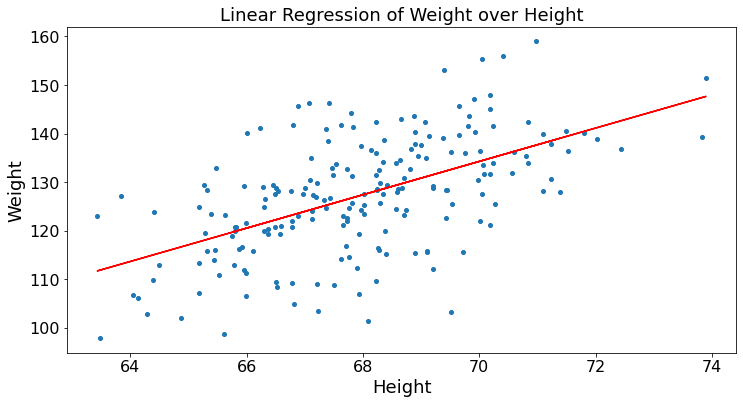

Look ma, I am doing Data Science!


In [47]:
from sklearn.linear_model import LinearRegression
HW_df = pd.read_excel('HW.xlsx',index_col = 0)
print(HW_df)
H = np.array(HW_df.iloc[:,0]).reshape((-1, 1)) # convert H into a column
W = HW_df.iloc[:,1]
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(H, W)  # perform linear regression
W_pred = linear_regressor.predict(H)  # make predictions

plt.ylabel("Weight")
plt.xlabel("Height")
plt.title("Linear Regression of Weight over Height")
plt.scatter(H, W)
plt.plot(H, W_pred, color='red')
plt.show()
print('Look ma, I am doing Data Science!')

## Monte Carlo

We use simulations to estimate the area of the intersection of two unit circles whose centers are separated by $C \geq 1$. The figure illustrates the setup.

![title](Figs/circles.pdf)

The code generates $10000$ points chosen uniformly inside the unit square $S$. It calculates the fraction of these points that fall in the intersection of the two circles.  This fraction is an estimate of half of the area of the intersection of the two circles.  A point $(x,y)$ is inside the first circle if $a^2 = x^2 + y^2 \leq 1$. It is inside the second circle if $b^2 = (x - C)^2 + y^2 \leq 1$. We include an estimate of the error based on the standard deviation of a Bernoulli random variable.

In [48]:
def estimateArea(C):
    N = 10000
    estimate = 0
    for n in range(N):
        x = np.random.uniform(0,1)
        y = np.random.uniform(0,1)
        estimate = (n*estimate + (x**2 + y**2 <= 1 and (x - C)**2 + y**2 <= 1))/(n+1)
    dev = 2.6*(estimate*(1-estimate))**(0.5)/100
    print('The area value is in [',round(2*estimate - dev,3),', ', round(2*estimate + dev,3),'] with probability 99%')
        
# C = widgets.FloatSlider(description='C', min = 1, max = 2, step = 0.1, value = 1.5, position = 'bottom', continuous_update = False)
# z = widgets.interactive(estimateArea, C = C)

# display(z) 

estimateArea(1.5)

interactive(children=(FloatSlider(value=1.5, continuous_update=False, description='C', max=2.0, min=1.0), Outp…

## Conclusions:

The previous examples illustrate how to generate random variables, their pdf and cdf, Markov chains, how to plot sequences, adjust widgets, and how to use pandas to manipulate DataFrames and analyze data with statistical tools.
If you are comfortable with Python, you can move on to the next chapter. Otherwise, you can review Appendix 1.